In [7]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
train_images.shape


(60000, 28, 28)

In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [44]:
len(test_labels)

10000

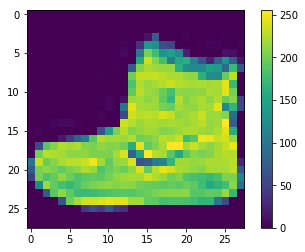

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

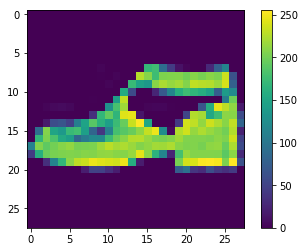

In [46]:
plt.figure()
plt.imshow(test_images[23])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255.00
test_images=test_images/255.00

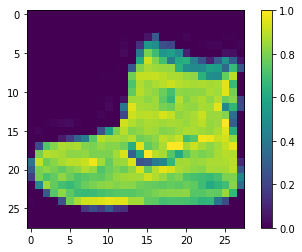

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

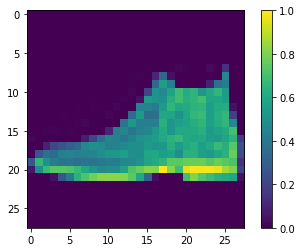

In [49]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

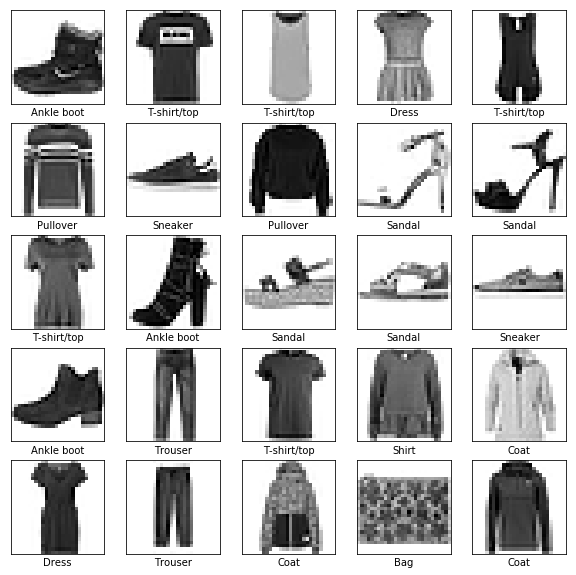

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5035 - acc: 0.8231
Epoch 2/6
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3764 - acc: 0.8646
Epoch 3/6
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3367 - acc: 0.8773
Epoch 4/6
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3133 - acc: 0.8853
Epoch 5/6
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2936 - acc: 0.8913
Epoch 6/6
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2787 - acc: 0.8970


In [54]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3414 - acc: 0.8773
Test accuracy: 0.8773


In [55]:
train_loss, train_acc = model.evaluate(train_images, train_labels)

print('accuracy:', train_acc)

60000/60000 [==============================] - 3s 42us/sample - loss: 0.2612 - acc: 0.9041
accuracy: 0.9041167


In [0]:
predictions=model.predict(test_images)

In [58]:
predictions[0]

array([2.0340881e-06, 1.6845084e-08, 6.2202474e-07, 7.2532833e-07,
       7.2679347e-07, 7.9189995e-03, 2.1332701e-06, 1.1428230e-02,
       6.3969354e-05, 9.8058254e-01], dtype=float32)

In [59]:
np.argmax(predictions[0])

9

In [60]:
test_labels[0]

9

In [0]:
def prediction(i):
  print(np.argmax(predictions[i]))
  print(test_labels[i])

In [85]:
prediciton(1000)

6
0


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

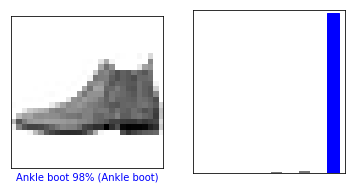

In [88]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

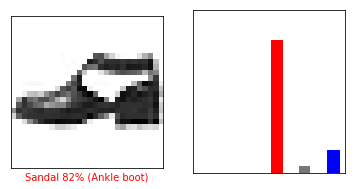

In [89]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

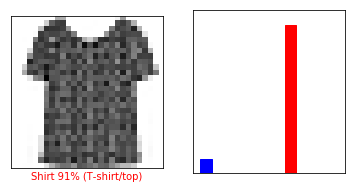

In [90]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

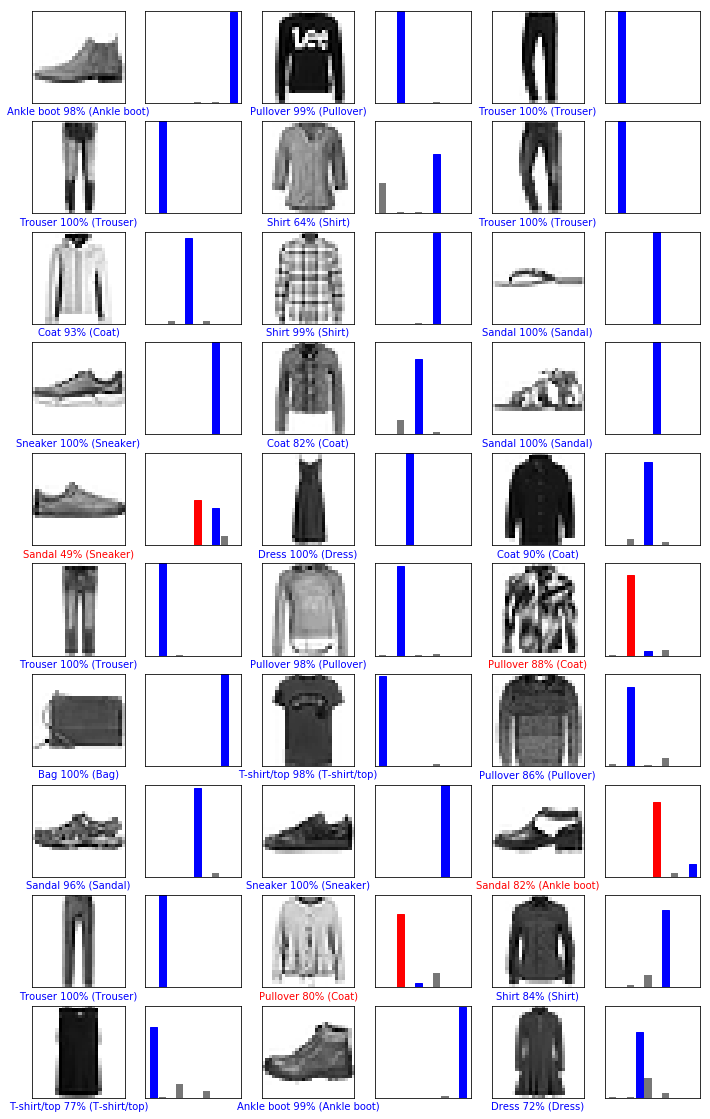

In [92]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

